# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001174 (version 0.250331.2218)](https://dandiarchive.org/dandiset/001174/0.250331.2218).

**Title:** Calcium imaging in SMA and M1 of macaques

**Description (from Dandiset metadata):**
The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1.

**Citation:**
Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001174/0.250331.2218

## What this notebook covers

This notebook will demonstrate how to:
1.  Connect to the DANDI archive and access metadata for Dandiset 001174.
2.  List some of the assets (files) available in this Dandiset.
3.  Load a specific NeurophysiologyWB (NWB) file from the Dandiset.
4.  Inspect basic metadata and structure of the NWB file.
5.  Load and visualize some example data, such as ROI fluorescence traces and image masks.

The goal is to provide a starting point for users interested in exploring and analyzing the data within this Dandiset.

## Required Packages

To run this notebook, you will need the following Python packages installed:

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for working with NWB files)
*   `h5py` (for HDF5 file access, used by PyNWB)
*   `remfile` (for streaming remote files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting styles)

It is assumed that these packages are already installed in your Python environment.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001174"
dandiset_version = "0.250331.2218"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This will be the draft URL
print(f"Dandiset published URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")


# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Dandiset published URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading an NWB file from the Dandiset

We will now load one specific NWB file from the Dandiset. For this example, we'll use the file:
`sub-F/sub-F_ses-20240213T110430_ophys.nwb`
(Asset ID: `193fee16-550e-4a8f-aab8-2383f6d57a03`).

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/`

We will use `remfile` and `pynwb` to stream and read this file.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for plots (excluding image plots)
sns.set_theme()

# URL of the NWB file (hardcoded as per instructions from nwb-file-info)
nwb_file_url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
asset_id = "193fee16-550e-4a8f-aab8-2383f6d57a03" # For Neurosift link

print(f"Loading NWB file from: {nwb_file_url}")

try:
    remote_file = remfile.File(nwb_file_url)
    h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode for safety with remote files
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True) # Add load_namespaces
    nwb = io.read()
    print("\nNWB file loaded successfully.")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session description: {nwb.session_description}")
    print(f"Session start time: {nwb.session_start_time}")
except Exception as e:
    print(f"\nAn error occurred while loading the NWB file: {e}")
    nwb = None # Set nwb to None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/



NWB file loaded successfully.
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2024-02-13 11:04:30.267000+00:00


### NWB File Metadata and Structure

Let's examine some of the metadata and high-level structure of the loaded NWB file.
(Note: We avoid displaying the full `nwb` object as it can produce very long output).

In [3]:
if nwb:
    print("--- General Information ---")
    print(f"Subject ID: {nwb.subject.subject_id if nwb.subject else 'N/A'}")
    print(f"Species: {nwb.subject.species if nwb.subject else 'N/A'}")
    print(f"Session ID: {nwb.session_id if nwb.session_id else 'N/A'}")
    print(f"Experimenter(s): {', '.join(nwb.experimenter) if nwb.experimenter else 'N/A'}")

    print("\n--- Acquisition Data ---")
    if "OnePhotonSeries" in nwb.acquisition:
        one_photon_series = nwb.acquisition["OnePhotonSeries"]
        print(f"OnePhotonSeries name: {one_photon_series.name}")
        print(f"  Description: {one_photon_series.description}")
        print(f"  Data shape: {one_photon_series.data.shape}")
        print(f"  Unit: {one_photon_series.unit}")
        print(f"  Imaging rate (Hz): {one_photon_series.rate} (from series) or {one_photon_series.imaging_plane.imaging_rate} (from plane)")
    else:
        print("OnePhotonSeries not found in acquisition.")

    print("\n--- Processing Modules ---")
    if "ophys" in nwb.processing:
        ophys_module = nwb.processing["ophys"]
        print(f"Processing module 'ophys' description: {ophys_module.description}")
        print("  Data interfaces in 'ophys':")
        for interface_name, data_interface in ophys_module.data_interfaces.items():
            print(f"    - {interface_name} ({type(data_interface).__name__})")
            if hasattr(data_interface, 'description'):
                print(f"        Description: {data_interface.description}")
            if hasattr(data_interface, 'roi_response_series'): # For Fluorescence
                 for rrs_name, rrs in data_interface.roi_response_series.items():
                    print(f"        - RoiResponseSeries '{rrs_name}':")
                    print(f"            Data shape: {rrs.data.shape}")
                    print(f"            Unit: {rrs.unit}")
                    print(f"            Number of ROIs: {rrs.rois.table.id.data.shape[0]}")
            elif hasattr(data_interface, 'rois'): # For RoiResponseSeries directly like EventAmplitude
                if hasattr(data_interface.rois, 'table') and hasattr(data_interface.rois.table, 'id'):
                     print(f"        Number of ROIs: {data_interface.rois.table.id.data.shape[0]}")
                     print(f"        Data shape: {data_interface.data.shape}")
                     print(f"        Unit: {data_interface.unit}")

            if interface_name == "ImageSegmentation":
                if "PlaneSegmentation" in data_interface.plane_segmentations:
                    plane_seg = data_interface.plane_segmentations["PlaneSegmentation"]
                    print(f"        - PlaneSegmentation '{plane_seg.name}':")
                    print(f"            Number of ROIs: {len(plane_seg.id)}")
                    print(f"            Image mask shape (example for ROI 0): {plane_seg['image_mask'][0].shape if len(plane_seg.id) > 0 else 'N/A'}")
    else:
        print("Processing module 'ophys' not found.")

--- General Information ---
Subject ID: F
Species: Macaca mulatta
Session ID: N/A
Experimenter(s): N/A

--- Acquisition Data ---
OnePhotonSeries name: OnePhotonSeries
  Description: Miniscope imaging data
  Data shape: (6026, 1280, 800)
  Unit: fluorescence
  Imaging rate (Hz): 10.0 (from series) or 10.0 (from plane)

--- Processing Modules ---
Processing module 'ophys' description: Optical physiology data obtained by processing raw calcium imaging data
  Data interfaces in 'ophys':
    - EventAmplitude (RoiResponseSeries)
        Description: Amplitude of neural events associated with spatial footprints
        Number of ROIs: 6
        Data shape: (6026, 6)
        Unit: fluorescence
    - Fluorescence (Fluorescence)
        - RoiResponseSeries 'RoiResponseSeries':
            Data shape: (6026, 6)
            Unit: fluorescence
            Number of ROIs: 6
    - ImageSegmentation (ImageSegmentation)
        - PlaneSegmentation 'PlaneSegmentation':
            Number of ROIs: 6


            Image mask shape (example for ROI 0): (318, 198)


### Explore data on Neurosift

You can explore this NWB file interactively on [Neurosift](https://neurosift.app) using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{asset_id}/download/&dandisetId={dandiset_id}&dandisetVersion={dandiset_version}](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=0.250331.2218)

(Note: The link above is pre-filled for the NWB file `sub-F/sub-F_ses-20240213T110430_ophys.nwb`)

## Visualizing Data from the NWB File

Now, let's load and visualize some data. We will focus on:
1.  Fluorescence traces for a few ROIs.
2.  Image masks of the ROIs.

### 1. ROI Fluorescence Traces

We'll access the `RoiResponseSeries` from the `ophys` processing module to get fluorescence traces.
The selected NWB file has a `RoiResponseSeries` under `processing['ophys']['Fluorescence']['RoiResponseSeries']`.
We will plot the traces for the first few ROIs over a short time segment to keep the visualization manageable and data loading quick.

Found RoiResponseSeries with 6 ROIs.
Plotting fluorescence traces for the first 3 ROIs over 500 time points.


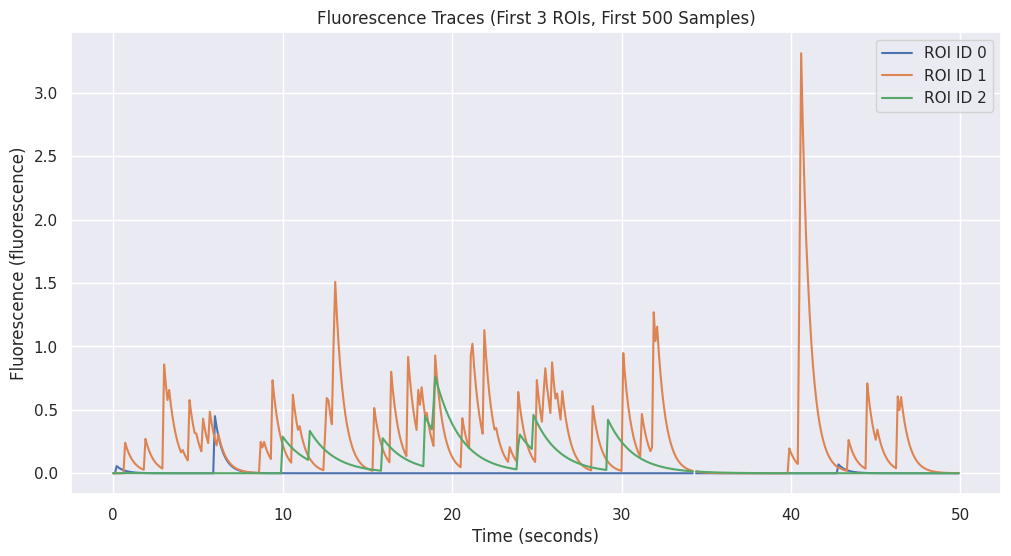

In [4]:
if nwb and "ophys" in nwb.processing and \
   "Fluorescence" in nwb.processing["ophys"].data_interfaces and \
   "RoiResponseSeries" in nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series:

    rrs = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
    num_rois = rrs.data.shape[1]
    print(f"Found RoiResponseSeries with {num_rois} ROIs.")

    # Determine number of ROIs and timepoints to plot
    rois_to_plot = min(num_rois, 3) # Plot up to 3 ROIs
    time_points_to_plot = min(rrs.data.shape[0], 500) # Plot up to 500 time points

    print(f"Plotting fluorescence traces for the first {rois_to_plot} ROIs over {time_points_to_plot} time points.")

    # Get ROI IDs. The actual IDs are stored in rrs.rois.table.id[:]
    roi_ids = rrs.rois.table.id[:]

    # Load a subset of data
    # Data is (time, rois)
    fluorescence_data_subset = rrs.data[:time_points_to_plot, :rois_to_plot]

    # Create timestamps for the subset
    # Timestamps can be generated from rate and starting_time if not explicitly stored for every point
    if rrs.timestamps is None or len(rrs.timestamps) == 0:
        # If global timestamps are not available, generate them based on rate
        # For a subset, we need to calculate based on the original series rate
        time_vector_subset = np.arange(time_points_to_plot) / rrs.rate + rrs.starting_time
    else:
        # If global timestamps exist, use the slice corresponding to loaded data
        time_vector_subset = rrs.timestamps[:time_points_to_plot]


    plt.figure(figsize=(12, 6))
    for i in range(rois_to_plot):
        plt.plot(time_vector_subset, fluorescence_data_subset[:, i], label=f'ROI ID {roi_ids[i]}')

    plt.title(f'Fluorescence Traces (First {rois_to_plot} ROIs, First {time_points_to_plot} Samples)')
    plt.xlabel(f'Time ({rrs.starting_time_unit})')
    plt.ylabel(f'Fluorescence ({rrs.unit})')
    plt.legend()
    plt.show()

else:
    if nwb:
      print("Could not find 'RoiResponseSeries' in the expected location: nwb.processing['ophys']['Fluorescence']['RoiResponseSeries']")
    else:
      print("NWB file not loaded, skipping fluorescence plot.")

### 2. ROI Image Masks

The `ImageSegmentation` interface, typically found under `processing['ophys']`, stores the spatial footprints (image masks) of the detected ROIs.
Each mask defines the pixels belonging to a specific ROI.
We will visualize the image masks by overlaying them.
We'll use `PlaneSegmentation` from `processing['ophys']['ImageSegmentation']['PlaneSegmentation']`.

Found PlaneSegmentation with 6 ROIs.


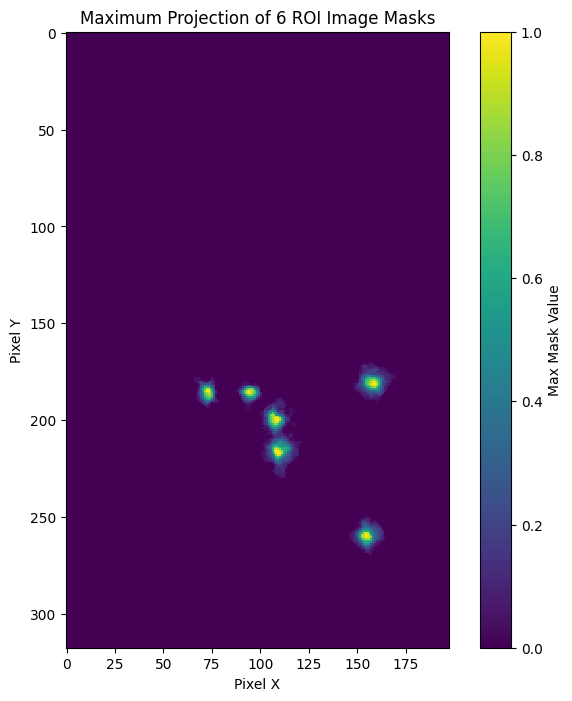

In [5]:
if nwb and "ophys" in nwb.processing and \
   "ImageSegmentation" in nwb.processing["ophys"].data_interfaces and \
   "PlaneSegmentation" in nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations:

    plane_seg = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
    num_rois_masks = len(plane_seg.id)
    print(f"Found PlaneSegmentation with {num_rois_masks} ROIs.")

    if num_rois_masks > 0:
        # Get all image masks. Each mask is (height, width)
        # plane_seg['image_mask'] is a VectorData object, so access its elements.
        # We need to load them into a 3D numpy array (num_rois, height, width)
        
        # Determine dimensions from the first mask
        first_mask_shape = plane_seg['image_mask'][0].shape
        all_masks_np = np.zeros((num_rois_masks, first_mask_shape[0], first_mask_shape[1]), dtype=np.float32)

        for i in range(num_rois_masks):
            mask_data = plane_seg['image_mask'][i] # This should be a 2D array
            all_masks_np[i, :, :] = mask_data

        # To visualize, we can take the maximum projection of all masks
        # This shows all ROIs superimposed.
        max_projection_mask = np.max(all_masks_np, axis=0)

        # Plotting without seaborn style for images
        plt.style.use('default') # Revert to default MPL style for this plot

        plt.figure(figsize=(8, 8))
        plt.imshow(max_projection_mask, cmap='viridis', interpolation='nearest') # Using viridis, good for intensity
        plt.title(f'Maximum Projection of {num_rois_masks} ROI Image Masks')
        plt.xlabel('Pixel X')
        plt.ylabel('Pixel Y')
        plt.colorbar(label='Max Mask Value')
        plt.show()

        # Restore seaborn theme if it was set
        sns.set_theme()
    else:
        print("No ROI masks found in PlaneSegmentation.")
else:
    if nwb:
        print("Could not find 'PlaneSegmentation' in the expected location for image masks.")
    else:
        print("NWB file not loaded, skipping image mask plot.")

### 3. Raw Calcium Imaging Data (OnePhotonSeries)

The raw imaging data is stored in `acquisition['OnePhotonSeries']`. This data can be very large.
It's typically a 3D array (time, height, width) or 4D (time, depth, height, width).
For this Dandiset, the shape is (time, height, width).

We'll load and display a single frame (the first frame) of the raw imaging data.
Accessing `OnePhotonSeries.data[0, :, :]` will load just the first frame.

Found OnePhotonSeries with data shape: (6026, 1280, 800)
Loading the first frame of the OnePhotonSeries data (shape: (1280, 800)).


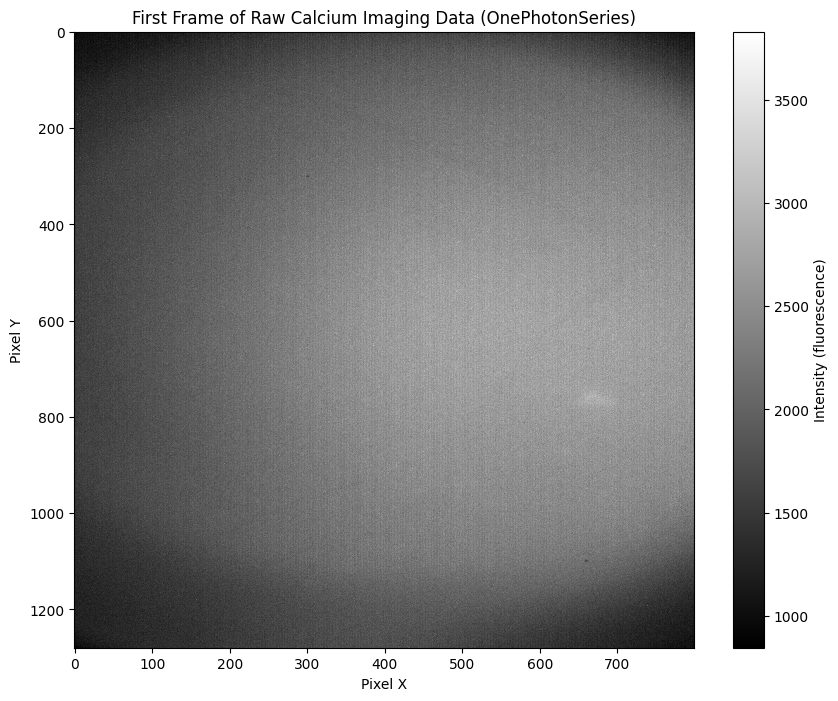

In [6]:
if nwb and "OnePhotonSeries" in nwb.acquisition:
    one_photon_series = nwb.acquisition["OnePhotonSeries"]
    data_shape = one_photon_series.data.shape
    print(f"Found OnePhotonSeries with data shape: {data_shape}")

    if len(data_shape) == 3 and data_shape[0] > 0: # Expecting (time, y, x)
        print(f"Loading the first frame of the OnePhotonSeries data (shape: {data_shape[1:]}).")
        
        # Load only the first frame
        first_frame = one_photon_series.data[0, :, :] # This is a 2D numpy array

        # Plotting without seaborn style for images
        plt.style.use('default') # Revert to default MPL style for this plot

        plt.figure(figsize=(10, 8))
        plt.imshow(first_frame, cmap='gray', aspect='auto', interpolation='nearest')
        plt.title('First Frame of Raw Calcium Imaging Data (OnePhotonSeries)')
        plt.xlabel('Pixel X')
        plt.ylabel('Pixel Y')
        plt.colorbar(label=f'Intensity ({one_photon_series.unit})')
        plt.show()

        # Restore seaborn theme if it was set
        sns.set_theme()
    else:
        print("OnePhotonSeries data is not in the expected 3D format or is empty.")
else:
    if nwb:
        print("OnePhotonSeries not found in nwb.acquisition or NWB file not loaded.")
    else:
        print("NWB file not loaded, skipping raw data plot.")

## Summary and Future Directions

This notebook demonstrated the initial steps for exploring Dandiset 001174. We covered:
*   Connecting to the DANDI archive and retrieving Dandiset metadata.
*   Listing assets within the Dandiset.
*   Loading a specific NWB file (`sub-F/sub-F_ses-20240213T110430_ophys.nwb`).
*   Inspecting its basic structure and metadata.
*   Visualizing sample data:
    *   Fluorescence traces for a subset of ROIs and time.
    *   A maximum projection of ROI image masks.
    *   The first frame of the raw calcium imaging data (`OnePhotonSeries`).

**Possible Future Directions:**

1.  **Detailed Event Analysis:** Explore the `EventAmplitude` data (if present and understood) to look at detected neural events.
2.  **Correlational Analysis:** Investigate correlations between the activity of different neurons (ROIs).
3.  **Task-Related Activity:** If behavioral data (e.g., trial information, stimuli, rewards) is available and synchronized, analyze neuronal activity in relation to specific task events. (This Dandiset mentions a reaching task, so such data might be present in other files or sections not deeply explored here).
4.  **Comparison Across Sessions/Subjects:** Extend the analysis to other NWB files in the Dandiset to compare neural activity patterns across different recording sessions or subjects.
5.  **Advanced Visualization:** Create more sophisticated visualizations, such as activity heatmaps across all ROIs or spatial maps of activity.
6.  **Data Exploration with Neurosift:** Use the provided Neurosift link for interactive exploration of the NWB file's full structure and data.

This notebook serves as a basic template. Users are encouraged to adapt and expand upon the provided code to perform more in-depth analyses relevant to their research questions. Remember to consult the NWB format documentation and the specific metadata of this Dandiset for a deeper understanding of the data.

Reminder: Close the HDF5 file if you opened it.
The `pynwb.NWBHDF5IO` object takes care of closing the underlying HDF5 file when the `io` object is closed or goes out of scope if it was opened via a file path.
When using `remfile` and `h5py.File` directly, as done here for streaming, it's good practice to ensure resources are released.
The `io.close()` method should handle closing the `h5py.File` object that was passed to it.

In [7]:
if 'io' in locals() and io._file is not None: # Check if 'io' exists and has an open file
    try:
        io.close()
        print("NWBHDF5IO closed.")
    except Exception as e:
        print(f"Error closing NWBHDF5IO: {e}")

if 'remote_file' in locals() and hasattr(remote_file, 'close'):
     try:
        remote_file.close()
        print("Remote file closed.")
     except Exception as e:
        print(f"Error closing remote file: {e}")

# Note: h5_file is managed by the NWBHDF5IO object, so closing io should suffice.
# If h5_file was opened independently and not passed to NWBHDF5IO, it would need explicit closing:
# if 'h5_file' in locals() and h5_file.id.valid: # Check if h5_file exists and is open
# try:
# h5_file.close()
# print("H5py file closed.")
# except Exception as e:
# print(f"Error closing h5py file: {e}")

NWBHDF5IO closed.
Remote file closed.
